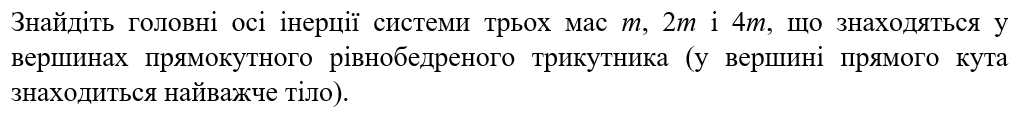

In [1]:
phi = var("phi")
m = var("m")

In [2]:
N = 3
mi = [m, 2*m, 4*m]
xi = [1, 0, 0]
yi = [0, 1, 0]
zi = [0, 0, 0]

Тензор інерції записуються у вигляді матриці

$$J=\left[\begin{array}{c}
    J_{xx} & J_{xy} & J_{xz}\\
    J_{yx} & J_{yy} & J_{yz}\\
    J_{zx} & J_{zy} & J_{zz}\\
\end{array}\right]$$

де

$$J_{xx} = \iiint\limits_{V}^{}(y^2+z^2)\,\rho(x,y,z) \, dx dy dz$$

$$J_{xy} = \iiint\limits_{V}^{}x y\,\rho(x,y,z) \, dx dy dz$$

де

$$J_{xx} = \sum\limits_{i}^{}\left(y_i^2+z_i^2\right)\,m_i $$

$$J_{xy} = \sum\limits_{i}^{}x_i y_i\,m_i$$

$$J=\left[\begin{array}{c}
    \sum\limits_{i}^{}\left(y_i^2+z_i^2\right)\,m_i & \sum\limits_{i}^{}x_i y_i\,m_i & \sum\limits_{i}^{}x_i z_i\,m_i\\
    \sum\limits_{i}^{}y_i x_i\,m_i & \sum\limits_{i}^{}\left(x_i^2+z_i^2\right)\,m_i & \sum\limits_{i}^{}y_i z_i\,m_i\\
    \sum\limits_{i}^{}z_i x_i\,m_i & \sum\limits_{i}^{}z_i y_i\,m_i & \sum\limits_{i}^{}\left(x_i^2+y_i^2\right)\\
\end{array}\right]$$

In [3]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [4]:
sum_m = sum([mi[i] for i in range(N)])
disp(sum_m)

<IPython.core.display.Math object>

In [5]:
xc = sum([mi[i]*xi[i] for i in range(N)])/sum_m
yc = sum([mi[i]*yi[i] for i in range(N)])/sum_m
zc = sum([mi[i]*zi[i] for i in range(N)])/sum_m
disp([xc,yc,zc])

<IPython.core.display.Math object>

In [6]:
x1i = [xi[i] - xc for i in range(N)]
y1i = [yi[i] - yc for i in range(N)]
z1i = [zi[i] - zc for i in range(N)]

In [7]:
disp([x1i, y1i])

<IPython.core.display.Math object>

In [8]:
Jxx = sum([mi[i]*(y1i[i]^2+z1i[i]^2) for i in range(N)])
Jyy = sum([mi[i]*(x1i[i]^2+z1i[i]^2) for i in range(N)])
Jzz = sum([mi[i]*(x1i[i]^2+y1i[i]^2) for i in range(N)])

In [9]:
Jxy = sum([mi[i]*(x1i[i]*y1i[i]) for i in range(N)])

In [10]:
J=matrix(SR,[[Jxx,Jxy,0],[Jxy,Jyy,0],[0,0,Jzz]])
disp(J)

<IPython.core.display.Math object>

$x'' = x'cos(\varphi)+y'sin(\varphi)$

$y'' = y'cos(\varphi)-x'sin(\varphi)$

In [18]:
x, y = var("x,y")
x2 = x*cos(phi) + y*sin(phi)
y2 = y*cos(phi) - x*sin(phi)

$$J''=\left[\begin{array}{c}
    \sum\limits_{i}^{}\left(y_i''^2+z_i''^2\right)\,m_i & \sum\limits_{i}^{}x_i'' y_i''\,m_i & \sum\limits_{i}^{}x_i'' z_i''\,m_i\\
    \sum\limits_{i}^{}y_i'' x_i''\,m_i & \sum\limits_{i}^{}\left(x_i''^2+z_i''^2\right)\,m_i & \sum\limits_{i}^{}y_i'' z_i''\,m_i\\
    \sum\limits_{i}^{}z_i'' x_i''\,m_i & \sum\limits_{i}^{}z_i'' y_i''\,m_i & \sum\limits_{i}^{}\left(x_i''^2+y_i''^2\right)\\
\end{array}\right]$$

$$J''_{xx} = \sum\limits_{i}^{}\left(y_i''^2+z_i''^2\right)\,m_i $$

$$J''_{yy} = \sum\limits_{i}^{}\left(x_i''^2+z_i''^2\right)\,m_i $$

$$J''_{zz} = \sum\limits_{i}^{}\left(x_i''^2+y_i''^2\right)\,m_i $$

$$J''_{xy} = \sum\limits_{i}^{}x_i'' y_i''\,m_i$$

$$J''_{xx} = \sum\limits_{i}^{}\left((y'cos(\varphi)-x'sin(\varphi))^2+z_i^2\right)\,m_i $$

$$J''_{xx} = \sum\limits_{i}^{}\left(y'^2 cos(\varphi)^2-2\,y'x'cos(\varphi)sin(\varphi)+x'^2\,sin(\varphi)^2+z_i^2\right)\,m_i $$

$$J''_{xx} = \sum\limits_{i}^{}\left(y'^2 cos(\varphi)^2-2\,y'x'cos(\varphi)sin(\varphi)+x'^2\,sin(\varphi)^2+z_i^2\right)\,m_i $$

In [43]:
disp((y2*y2).expand())

<IPython.core.display.Math object>

$$z=0$$

$$J''_{xx} = J'_{xx} cos(\varphi)^2-2\,J'_{yx}cos(\varphi)sin(\varphi)+J'_{yy}\,sin(\varphi)^2$$

$$J''_{yy} = \sum\limits_{i}^{}\left(x_i''^2+z_i''^2\right)\,m_i $$

$$J''_{yy} = \sum\limits_{i}^{}\left((x'cos(\varphi)+y'sin(\varphi))^2+z_i''^2\right)\,m_i $$

$$J''_{yy} = \sum\limits_{i}^{}\left(x'^2\,cos(\varphi)^2+2\,x'y'cos(\varphi)sin(\varphi)+y'^2\,sin(\varphi)^2+z_i''^2\right)\,m_i $$

In [42]:
disp((x2*x2).expand())

<IPython.core.display.Math object>

$$z=0$$

$$J''_{yy} = J'_{yy}\,cos(\varphi)^2+2\,J'_{xy}\,cos(\varphi)sin(\varphi)+J'_{xx}\,sin(\varphi)^2 $$

$$J''_{xy} = \sum\limits_{i}^{}(x'cos(\varphi)+y'sin(\varphi)) (y'cos(\varphi)-x'sin(\varphi))\,m_i$$

$$J''_{xy} = \sum\limits_{i}^{}(x'y'cos(\varphi)cos(\varphi)+y'y'sin(\varphi)cos(\varphi)-x'x'cos(\varphi)sin(\varphi)-y'x'sin(\varphi)sin(\varphi)) \,m_i$$


$$J''_{xy} = \sum\limits_{i}^{}(x'y'cos(\varphi)cos(\varphi)-y'x'sin(\varphi)sin(\varphi)-x'x'cos(\varphi)sin(\varphi)+y'y'sin(\varphi)cos(\varphi)) \,m_i$$


$$J''_{xy} = \sum\limits_{i}^{}(x'y'cos(\varphi)^2-y'x'sin(\varphi)^2+y'y'sin(\varphi)cos(\varphi)-x'x'cos(\varphi)sin(\varphi)) \,m_i$$

$$J''_{xy} = \sum\limits_{i}^{}(x'y'cos(\varphi)^2-y'x'sin(\varphi)^2+(y'y'-x'x')cos(\varphi)sin(\varphi)) \,m_i$$


$$J''_{xy} = \sum\limits_{i}^{}(x'y'(cos(\varphi)^2-sin(\varphi)^2)+(y'^2-x'^2)cos(\varphi)sin(\varphi)) \,m_i$$

In [22]:
disp((x2*y2).expand())

<IPython.core.display.Math object>

$$J''_{xy} = J'_{xy}(cos(\varphi)^2-sin(\varphi)^2)+(J'_{xx}-J'_{yy})cos(\varphi)sin(\varphi))$$

$$J''_{xy} = 0$$

$$0 = J'_{xy}(cos(\varphi)^2-sin(\varphi)^2)+(J'_{xx}-J'_{yy})cos(\varphi)sin(\varphi))$$

In [23]:
eq = sin(phi)*cos(phi)*(Jxx-Jyy) + (cos(phi)^2 - sin(phi)^2)*(Jxy) == 0
disp(eq)

<IPython.core.display.Math object>

In [24]:
sol_phi = solve (eq, phi)
disp(sol_phi)

<IPython.core.display.Math object>

In [29]:
disp(sol_phi[0]/cos(phi))

<IPython.core.display.Math object>

In [30]:
disp(sol_phi[1]/cos(phi))

<IPython.core.display.Math object>

In [44]:
sol_phi_0 = (atan((sol_phi[0]/cos(phi)).rhs()))
sol_phi_0

-arctan(sqrt(2) + 1)

In [45]:
sol_phi_1 = (atan((sol_phi[1]/cos(phi)).rhs()))
sol_phi_1

arctan(sqrt(2) - 1)

In [40]:
sol_phi_0-sol_phi_1

-90.0000000000000

$$z=0$$

$$J''_{xx} = J'_{xx} cos(\varphi)^2-2\,J'_{yx}cos(\varphi)sin(\varphi)+J'_{yy}\,sin(\varphi)^2$$

In [48]:
J2_xx = Jxx*cos(sol_phi_1)^2 - 2*Jxy*cos(sol_phi_1)*sin(sol_phi_1) + Jyy*sin(sol_phi_1)^2
disp(J2_xx)

<IPython.core.display.Math object>

$$z=0$$

$$J''_{yy} = J'_{yy}\,cos(\varphi)^2+2\,J'_{xy}\,cos(\varphi)sin(\varphi)+J'_{xx}\,sin(\varphi)^2 $$

In [50]:
J2_yy = Jyy*cos(sol_phi_1)^2 + 2*Jxy*cos(sol_phi_1)*sin(sol_phi_1) + Jxx*sin(sol_phi_1)^2
disp(J2_yy)

<IPython.core.display.Math object>

In [52]:
J2_zz = J2_xx + J2_yy
disp(J2_zz)

<IPython.core.display.Math object>

In [53]:
J2=matrix(SR,[[J2_xx,0,0],[0,J2_yy,0],[0,0,J2_zz]])
disp(J2)

<IPython.core.display.Math object>